<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/asa_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 응급 여부 및 ASA physical status에 따른 사망률
본 예제에서는 vitaldb 데이터셋으로부터 ASA physical status 에 따른 사망률을 비교해보자.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# vitaldb open dataset 에서 clinical information 을 로딩
df = pd.read_csv("https://api.vitaldb.net/cases")

df
# asa 컬럼: asa class
# emop 컬럼: 응급 수술 여부 Y/N
# death_inhosp: 원내 사망 여부 Y/N

,caseid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,devices,tracks,casedur,filesize,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,opdur,anedur,los_postop,los_icu,death_inhosp,preop_htn,preop_dm,preop_arrhythmia,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_glucose,preop_alb,preop_got,preop_gpt,preop_bun,preop_cr,preop_ph,preop_hco3,preop_be,preop_pao2,preop_paco2,preop_spo2,cormack,airway,tubesize,dltubesize,lmasize,iv1,iv2,aline1,aline2,cline1,cline2,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,0,11520,-540,10860,-540,10380,-236220,627780,4,78,192,21.3,77.0,M,160.2,67.50,26.3,2.0,N,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,145,180,8,0,N,Y,N,N,Normal,14.1,189,94.0,33.2,141.0,3.1,134.0,4.3,18,16,10.0,0.82,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,N,Left radial,N,N,N,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0
1,2,0,15720,-1020,14940,1740,14640,-221160,1506840,5,75,262,26.3,54.0,M,167.3,54.80,19.6,2.0,N,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,215,245,19,0,N,N,N,N,Normal,10.2,251,110.0,31.9,143.0,4.7,88.0,3.8,18,15,14.0,0.86,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,50.0,700.0,0,0,800.0,0,150,0.0,0,100,0,20,0,0,0
2,3,0,4440,-540,4260,-540,3960,-218640,40560,5,80,73,6.6,62.0,M,169.1,69.70,24.4,1.0,N,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,32,65,2,0,N,N,N,N,Normal,14.2,373,103.0,30.3,144.0,4.9,87.0,4.2,17,34,14.0,1.18,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,NaN,NaN,0,0,200.0,0,0,0.0,0,50,0,0,0,0,0
3,4,0,21000,-720,20280,2580,18180,-201120,576480,5,74,350,28.3,74.0,M,160.6,53.00,20.5,2.0,N,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,255,335,7,1,N,Y,N,N,Normal,14.4,275,103.0,34.5,141.0,4.2,108.0,4.1,23,18,10.0,0.96,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,NaN,NaN,NaN,Left forearm,N,Right radial,N,N,N,NaN,270.0,0,0,2700.0,0,80,0.0,100,100,0,50,0,0,0
4,5,0,21540,-960,22440,2640,21840,-67560,3734040,6,99,359,41.0,66.0,M,171.0,59.70,20.4,3.0,Y,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,295,350,45,13,N,Y,N,Left anterior fascicular block,Normal,10.1,67,73.0,36.5,146.0,4.4,126.0,2.6,765,77,50.0,4.43,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,N,Right radial,N,Right IJV,N,2600.0,1490.0,8,8,7100.0,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,0,15240,-240,15660,-240,15060,-215340,648660,5,73,254,9.3,64.0,M,161.5,63.00,24.2,1.0,N,General surgery,Stomach,Advanced gastric cancer,Total gastrectomy,Open,Supine,General,200,245,8,0,N,N,N,N,Normal,14.5,279,109.0,31,NaN,NaN,100.0,4.2,31,33,13.0,0.99,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,100.0,330.0,0,0,550.0,0,150,0.0,0,90,0,20,0,0,0
6384,6385,0,20640,-540,21000,-540,19800,-225600,1675200,5,76,344,29.0,69.0,M,159.3,62.30,24.6,2.0,N,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,285,335,20,0,N,Y,N,N,Normal,15.2,239,114.0,28.7,144.0,4.0,140.0,3.7,18,28,19.0,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,Right forearm,Left forearm,Right radial,N,N,N,100.0,250.0,0,0,2500.0,0,100,0.0,0,100,0,25,30,0,300
6385,6386,0,19440,-660,19140,3540,18540,-200460,836340,5,76,324,31.4,61.0,F,151.7,43.25,18.8,1.0,N,General surgery,Stomach,Earl

In [7]:
# emop, death_inhosp 컬럼을 'Y/N' 에서 True/False 로 변경
df['emop'] = df['emop'] == 'Y'
df['death_inhosp'] = df['death_inhosp'] == 'Y'

df

,caseid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,devices,tracks,casedur,filesize,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,opdur,anedur,los_postop,los_icu,death_inhosp,preop_htn,preop_dm,preop_arrhythmia,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_glucose,preop_alb,preop_got,preop_gpt,preop_bun,preop_cr,preop_ph,preop_hco3,preop_be,preop_pao2,preop_paco2,preop_spo2,cormack,airway,tubesize,dltubesize,lmasize,iv1,iv2,aline1,aline2,cline1,cline2,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,0,11520,-540,10860,-540,10380,-236220,627780,4,78,192,21.3,77.0,M,160.2,67.50,26.3,2.0,False,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,145,180,8,0,False,Y,N,N,Normal,14.1,189,94.0,33.2,141.0,3.1,134.0,4.3,18,16,10.0,0.82,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,N,Left radial,N,N,N,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0
1,2,0,15720,-1020,14940,1740,14640,-221160,1506840,5,75,262,26.3,54.0,M,167.3,54.80,19.6,2.0,False,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,215,245,19,0,False,N,N,N,Normal,10.2,251,110.0,31.9,143.0,4.7,88.0,3.8,18,15,14.0,0.86,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,50.0,700.0,0,0,800.0,0,150,0.0,0,100,0,20,0,0,0
2,3,0,4440,-540,4260,-540,3960,-218640,40560,5,80,73,6.6,62.0,M,169.1,69.70,24.4,1.0,False,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,32,65,2,0,False,N,N,N,Normal,14.2,373,103.0,30.3,144.0,4.9,87.0,4.2,17,34,14.0,1.18,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,NaN,NaN,0,0,200.0,0,0,0.0,0,50,0,0,0,0,0
3,4,0,21000,-720,20280,2580,18180,-201120,576480,5,74,350,28.3,74.0,M,160.6,53.00,20.5,2.0,False,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,255,335,7,1,False,Y,N,N,Normal,14.4,275,103.0,34.5,141.0,4.2,108.0,4.1,23,18,10.0,0.96,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,NaN,NaN,NaN,Left forearm,N,Right radial,N,N,N,NaN,270.0,0,0,2700.0,0,80,0.0,100,100,0,50,0,0,0
4,5,0,21540,-960,22440,2640,21840,-67560,3734040,6,99,359,41.0,66.0,M,171.0,59.70,20.4,3.0,True,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,295,350,45,13,False,Y,N,Left anterior fascicular block,Normal,10.1,67,73.0,36.5,146.0,4.4,126.0,2.6,765,77,50.0,4.43,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,N,Right radial,N,Right IJV,N,2600.0,1490.0,8,8,7100.0,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,0,15240,-240,15660,-240,15060,-215340,648660,5,73,254,9.3,64.0,M,161.5,63.00,24.2,1.0,False,General surgery,Stomach,Advanced gastric cancer,Total gastrectomy,Open,Supine,General,200,245,8,0,False,N,N,N,Normal,14.5,279,109.0,31,NaN,NaN,100.0,4.2,31,33,13.0,0.99,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,N,N,N,N,N,100.0,330.0,0,0,550.0,0,150,0.0,0,90,0,20,0,0,0
6384,6385,0,20640,-540,21000,-540,19800,-225600,1675200,5,76,344,29.0,69.0,M,159.3,62.30,24.6,2.0,False,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,285,335,20,0,False,Y,N,N,Normal,15.2,239,114.0,28.7,144.0,4.0,140.0,3.7,18,28,19.0,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,Right forearm,Left forearm,Right radial,N,N,N,100.0,250.0,0,0,2500.0,0,100,0.0,0,100,0,25,30,0,300
6385,6386,0,19440,-660,19140,3540,18540,-200460,836340,5,76,324,31.4,61.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

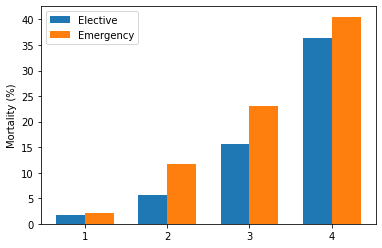

In [10]:
# ASA class 에 따라 
x = np.arange(1,5)
el_y = [df[(df['asa'] == asa) & ~df['emop']]['death_inhosp'].mean() * 100 for asa in x]
em_y = [df[(df['asa'] == asa) & df['emop']]['death_inhosp'].mean() * 100 for asa in x]

# 그림을 그림
fig, ax = plt.subplots()
w = 0.35
ax.bar(x - w/2, el_y, w, label='Elective')
ax.bar(x + w/2, em_y, w, label='Emergency')
ax.set_ylabel('Mortality (%)')
ax.set_xticks(x)
ax.legend()
plt